In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

%matplotlib inline
fig_size = [16, 9]
plt.rcParams['figure.figsize'] = fig_size

In [6]:
iris = load_iris()

X = iris.data[:, (2, 3)] # petal length, width
y = (iris.target == 0).astype(np.int) # 1 = Setosa

In [8]:
perceptron_clf = Perceptron(random_state = 76)
perceptron_clf.fit(X, y)

y_pred = perceptron_clf.predict([[2, 0.5]])
y_pred

array([1])

[0.5, 6.5, 0, 3]

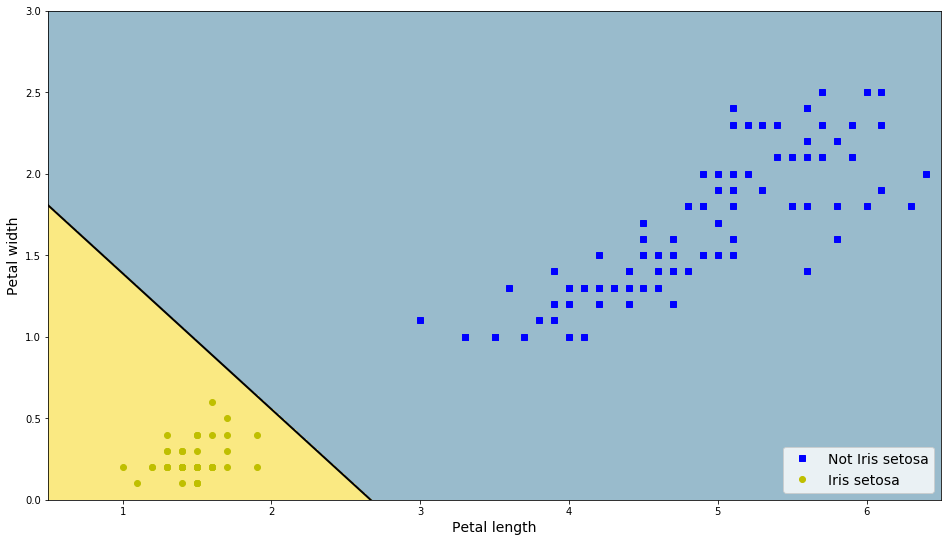

In [14]:
a = -perceptron_clf.coef_[0][0] / perceptron_clf.coef_[0][1] 
b = -perceptron_clf.intercept_ / perceptron_clf.coef_[0][1]

axes = [0.5, 6.5, 0, 3]

x0, x1 = np.meshgrid(np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
                     np.linspace(axes[2], axes[3], 200).reshape(-1, 1),)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = perceptron_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.plot(X[y == 0, 0], X[y == 0, 1], 'bs', label = 'Not Iris setosa')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'yo', label = 'Iris setosa')
plt.plot([axes[0], axes[1]], 
         [a * axes[0] + b, a * axes[1] + b], 
         'k-', 
         linewidth = 2)
custom_cmap = ListedColormap(['#99BBCC', '#FAE982'])

plt.contourf(x0, x1, zz, cmap = custom_cmap, linewidth = 4)
plt.xlabel('Petal length', fontsize = 14)
plt.ylabel('Petal width', fontsize = 14)
plt.legend(loc = 'lower right', fontsize = 14)
plt.axis(axes)